<img src='stackoverflow.jpg'/>

In [1]:
#importing all the necessary lib
import warnings
warnings.filterwarnings("ignore")
from sqlalchemy import create_engine
import pandas as pd
import sqlite3 as sq
import os
from datetime import datetime
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate,KFold
from sklearn.metrics import f1_score,hamming_loss,classification_report


# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [2]:
#creating train database file from train csv file
if not os.path.isfile('train.db'):
    engine = create_engine('sqlite:///train.db')
    start_index = 1
    start = datetime.now()
    for df in pd.read_csv('Train.csv',chunksize= 280000,encoding= 'utf-8',iterator=True,):
        df.index += start_index
        df.to_sql('data', engine, if_exists='append')
    print('Time required to run this block =',datetime.now() - start )

<h3> 3.1.2 Counting the number of rows </h3>

In [3]:
#SQL query to determine the number of rows in database
if os.path.isfile('train.db'):
    start = datetime.now()
    conn = sq.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT COUNT(*) FROM data""",conn)
    print("Total number of rows in database is ",num_rows['COUNT(*)'].values)
    conn.close()
    print("Time required to run this cell = ", datetime.now() - start)
else:
    print(" File not Created ", '\n', 'Run Previous Cell')

Total number of rows in database is  [6034195]
Time required to run this cell =  0:00:25.500959


<h3>3.1.3 Checking for duplicates </h3>

In [4]:
#SQL query to check for duplicates in the database and replacing each duplicate question with single entry
if os.path.isfile('train.db'):
    start = datetime.now()
    conn = sq.connect('train.db')
    df_tag_no_dupl = pd.read_sql_query("SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags",conn)
    conn.close()
    print("Time required to rum this cell = ", datetime.now() - start)
else:
    print("Create Database File before running this cell.")

Time required to rum this cell =  0:26:56.247218


In [5]:
df_tag_no_dupl.head(5) # dataframe with duplicates with cnt_dup indicating the number of times  each question appeared in the databse

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [6]:
print("Total number of Duplicate rows in the database :",num_rows['COUNT(*)'].values[0] - df_tag_no_dupl.shape[0],'(', ((num_rows['COUNT(*)'].values[0] - df_tag_no_dupl.shape[0]) / num_rows['COUNT(*)'].values[0]) * 100,'% )')


Total number of Duplicate rows in the database : 1827881 ( 30.29204392632323 % )


In [7]:
print("Number of times each question appeared in the databse:")
print(df_tag_no_dupl['cnt_dup'].value_counts())

Number of times each question appeared in the databse:
1    2656283
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64


In [8]:
#checking for any null values in the database
start = datetime.now()
print("Number of Null / NA values in the database")
print(df_tag_no_dupl.isnull().sum())
print("Time required to execute this cell :", datetime.now() - start)

Number of Null / NA values in the database
Title      0
Body       0
Tags       7
cnt_dup    0
dtype: int64
Time required to execute this cell : 0:00:01.757348


##### observation: there are a total of 7 Null values in Tag columns. We remove all the rows in the dataframe where tags are null

In [9]:
df_tag_no_dupl.dropna(axis= 0 , how= 'any', inplace= True)

In [10]:
df_tag_no_dupl.shape

(4206307, 4)

In [11]:
#adding another column in dataframe df_tag_no_dupl called tag_Count.
#Tag_count indicates the number of tags in each question
start = datetime.now()
count = []
for x in df_tag_no_dupl['Tags']:
    count.append(len(x.split()))
df_tag_no_dupl['tag_count'] = count
print("Time taken to exceute this cell :", datetime.now() - start)
df_tag_no_dupl.head(4)

Time taken to exceute this cell : 0:00:03.313090


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2


In [12]:
df_tag_no_dupl.shape

(4206307, 5)

In [13]:
# distribution of number of tags per question
df_tag_no_dupl['tag_count'].value_counts()

3    1206157
2    1111706
4     814996
1     568290
5     505158
Name: tag_count, dtype: int64

In [14]:
#Saving the dataframe with df_tag_no_dupl in sql database train_no_dupl
if not os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    engine = create_engine('sqlite:///train_no_dup.db')
    df_no_dup = pd.DataFrame(df_tag_no_dupl)
    df_no_dup.to_sql('df_no_dup',engine)
    print("Time required to execute this cell: ", datetime.now() - start)
    
else:
    print('Please Run previous cell before executing this cell')

Time required to execute this cell:  0:09:49.048225


In [15]:
#REading the database with no duplicates into a dataframe
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    conn = sq.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM df_no_dup""",conn)
    conn.close()
    print("Time required to execute this cell :", datetime.now() - start)
else:
    print('Please Run previous cell before executing this cell')
    

Time required to execute this cell : 0:02:00.758557


In [16]:
print('Number of data points in Tags :', tag_data.shape[0],'\n')
print(tag_data.head())

Number of data points in Tags : 4206307 

                                  Tags
0                                c++ c
1          c# silverlight data-binding
2  c# silverlight data-binding columns
3                             jsp jstl
4                            java jdbc


<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [17]:
#Using countvectorizer to determine the number of unique tags
bag_of_words = CountVectorizer(tokenizer= lambda x : x.split())
bow_tags = bag_of_words.fit_transform(tag_data['Tags'])
print("Numner of data points: ", bow_tags.shape[0])
print("Number of unique tags :", bow_tags.shape[1])

Numner of data points:  4206307
Number of unique tags : 42048


In [18]:
#Printing few of the unique tags
print("Few of the unique tags:", bag_of_words.get_feature_names()[:20])

Few of the unique tags: ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [19]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = bow_tags.sum(axis=0).A1


In [20]:
#Dict containing the unique tags with respective freq of occurance
tag_freq = dict(zip(bag_of_words.get_feature_names(),freqs))

In [21]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_freq.csv'):
    with open('tag_freq.csv','w') as csv_file:
        writer = csv.writer(csv_file)
       
        for key,value in tag_freq.items():
            writer.writerow([key,value])
else:
    print("File already exists")

In [3]:
#creating dataframe from csv file.
df_tag_freq = pd.read_csv('tag_freq.csv', names = ['Tags','Freq'])
df_tag_freq.head(5)

,Tags,Freq
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [4]:
#Sorting the dataframe in desending order
df_tag_freq_sorted = df_tag_freq.sort_values(['Freq'],ascending= False)
df_tag_freq_sorted.head()

,Tags,Freq
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436


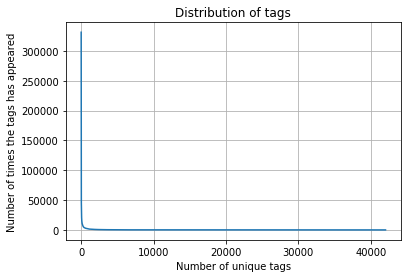

In [5]:
plt.plot(df_tag_freq_sorted['Freq'].values)
plt.grid()
plt.xlabel('Number of unique tags')
plt.ylabel('Number of times the tags has appeared')
plt.title("Distribution of tags")
plt.show()

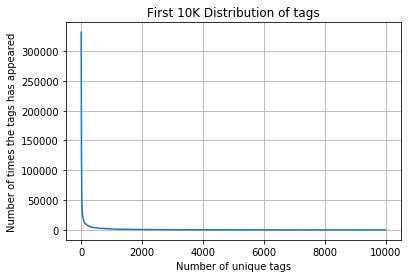

In [6]:
plt.plot(df_tag_freq_sorted['Freq'].values[:10000])
plt.grid()
plt.xlabel('Number of unique tags')
plt.ylabel('Number of times the tags has appeared')
plt.title("First 10K Distribution of tags")
plt.show()

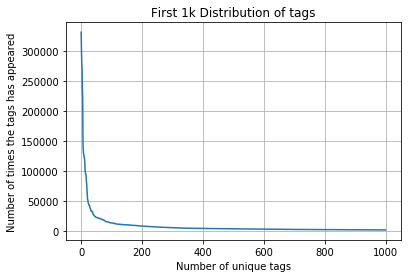

In [26]:
plt.plot(df_tag_freq_sorted['Freq'].values[:1000])
plt.grid()
plt.xlabel('Number of unique tags')
plt.ylabel('Number of times the tags has appeared')
plt.title("First 1k Distribution of tags")
plt.show()

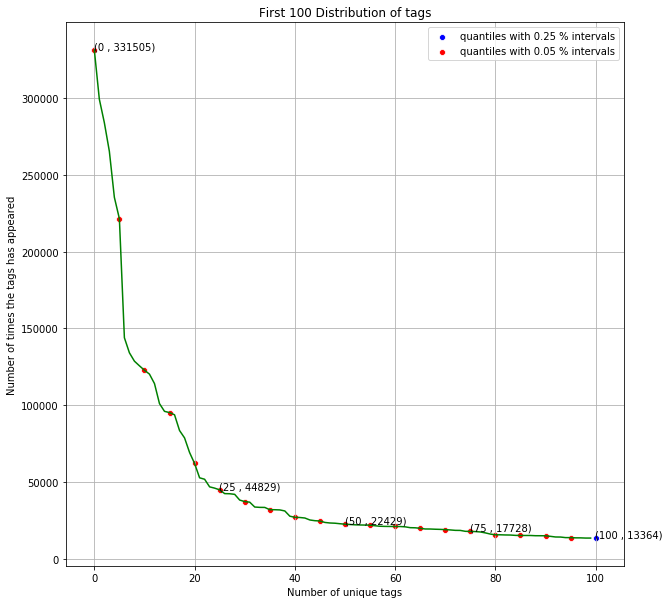

In [7]:
plt.figure(figsize=(10,10))
plt.plot(df_tag_freq_sorted['Freq'].values[0:100], color = 'green')
sns.scatterplot(x=list(range(0,125,25)), y=df_tag_freq_sorted['Freq'].values[0:125:25], color = 'b', label = "quantiles with 0.25 % intervals")
sns.scatterplot(x=list(range(0,100,5)), y=df_tag_freq_sorted['Freq'].values[0:100:5], color = 'r', label = "quantiles with 0.05 % intervals")
for x,y in zip(list(range(0,125,25)), df_tag_freq_sorted['Freq'].values[0:125:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
plt.grid()
plt.legend()
plt.xlabel('Number of unique tags')
plt.ylabel('Number of times the tags has appeared')
plt.title("First 100 Distribution of tags")
plt.show()

In [28]:
# Store tags greater than 10K in one list
tags_10k = list(df_tag_freq_sorted['Tags'][df_tag_freq_sorted['Freq'] > 10000])
#Print the length of the list
print("%r Tags are used more than 10k times"%len(tags_10k))
# Store tags greater than 100K in one list
tags_100k = list(df_tag_freq_sorted['Tags'][df_tag_freq_sorted['Freq'] > 100000])
#Print the length of the list.
print("%r Tags are used more than 100k times"%len(tags_100k))

153 Tags are used more than 10k times
14 Tags are used more than 100k times


In [29]:
print("Few of the tags that appear 10K and 100k times", tags_100k)

Few of the tags that appear 10K and 100k times ['c#', 'java', 'php', 'javascript', 'android', 'jquery', 'c++', 'python', 'iphone', 'asp.net', 'mysql', 'html', '.net', 'ios']


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [30]:
#Reading the train_no_dup database column which has number of tags per questions
if os.path.isfile('train_no_dup.db'):
    conn = sq.connect('train_no_dup.db') 
    tags_per_question = pd.read_sql_query("""SELECT tag_count FROM df_no_dup""",conn)

else:
    print("File Does not exist")


In [31]:
tags_per_question.head()

,tag_count
0,2
1,3
2,4
3,2
4,2


In [32]:
print("Maximum number of tags per question:", max(tags_per_question['tag_count']))
print("Minimum number of tags per question:", min(tags_per_question['tag_count']))
print("Avg. number of tags per question:", sum(tags_per_question['tag_count'])/tags_per_question.shape[0] )

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.8994429079950654


In [33]:
tags_per_question['tag_count'].value_counts()

3    1206157
2    1111706
4     814996
1     568290
5     505158
Name: tag_count, dtype: int64

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

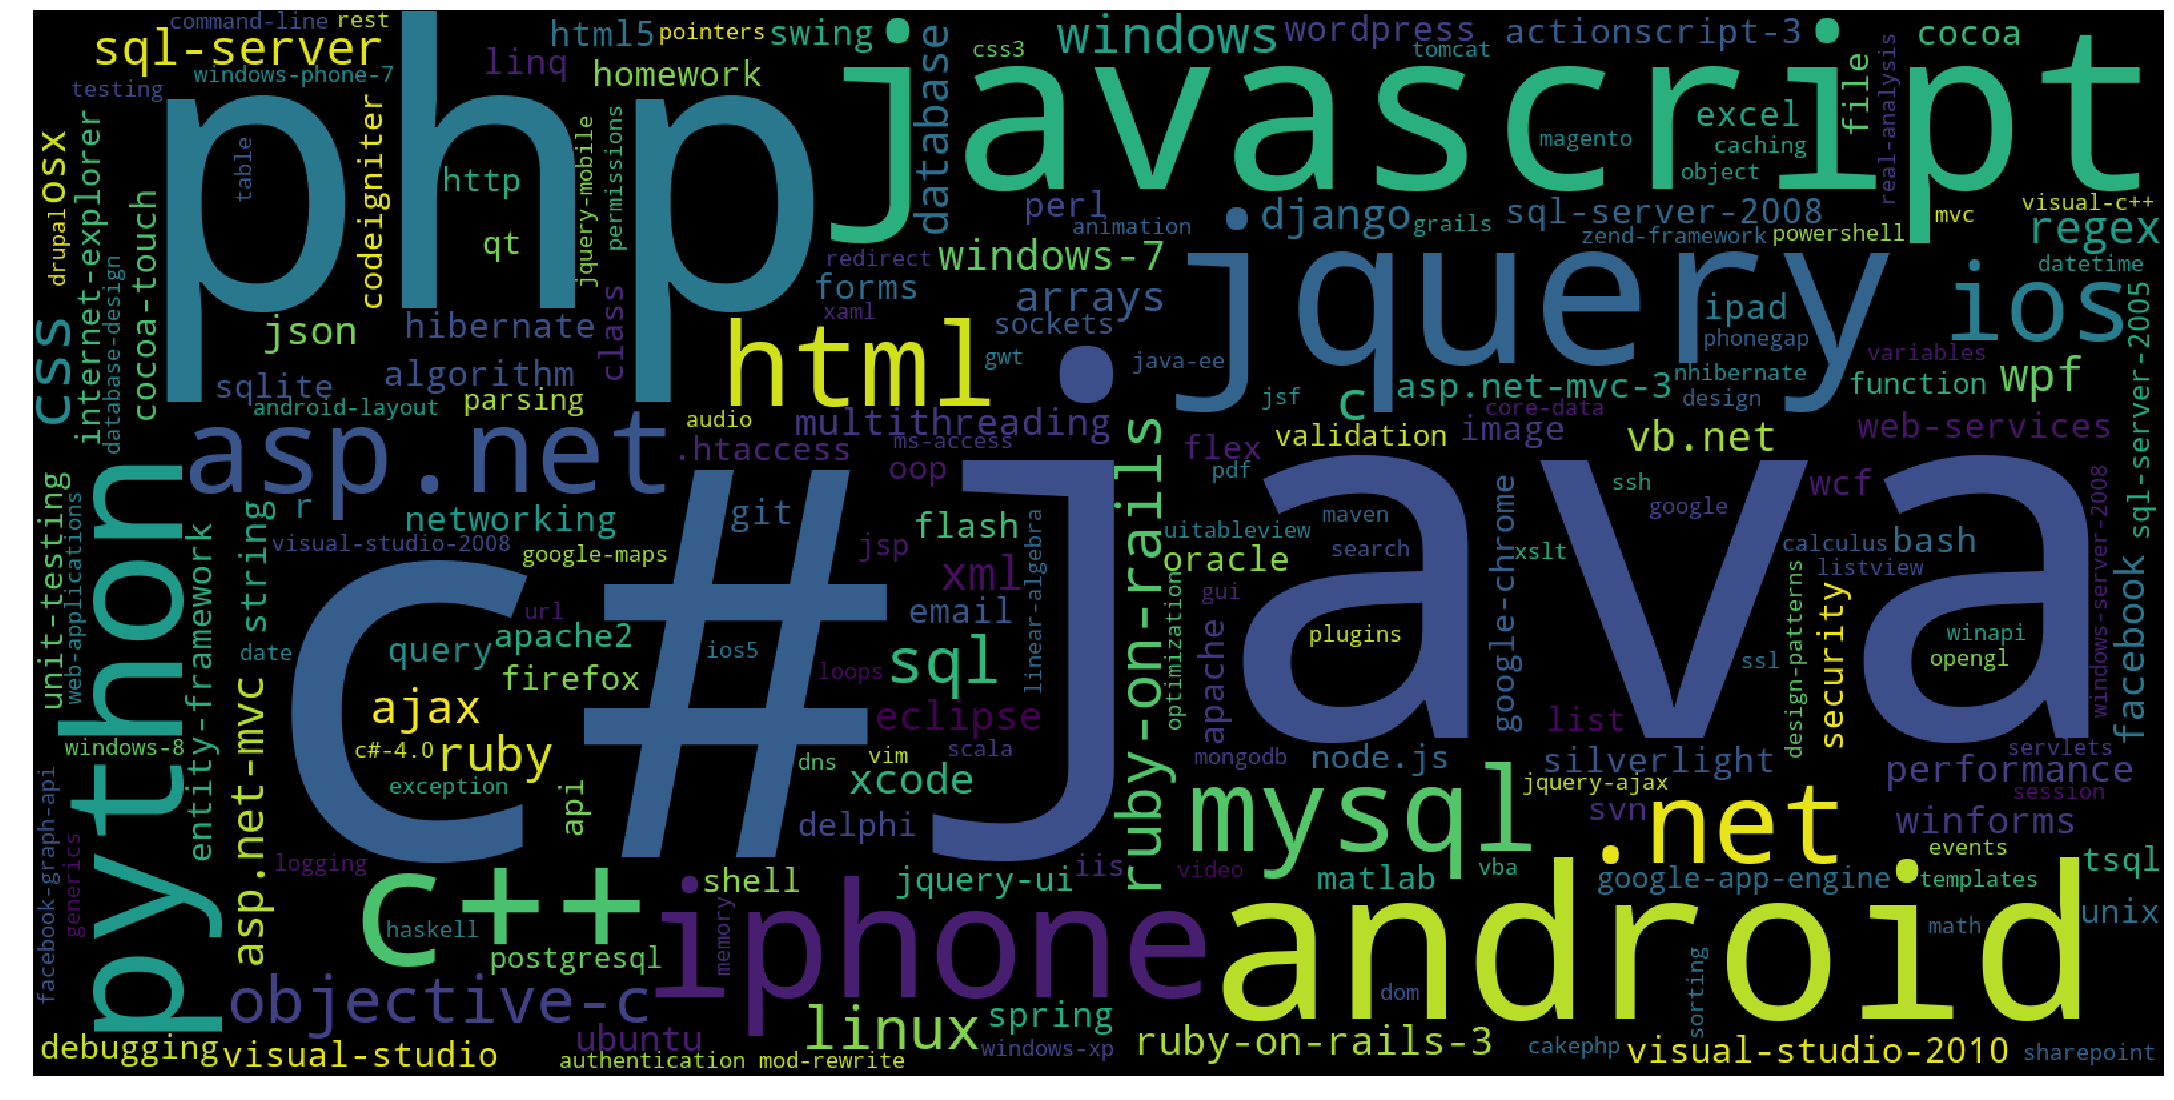

Time taken to run this cell : 0:00:03.395564


In [34]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(tag_freq.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 30 tags </h3>

In [35]:
df_tag_freq_sorted.head()

,Tags,Freq
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436


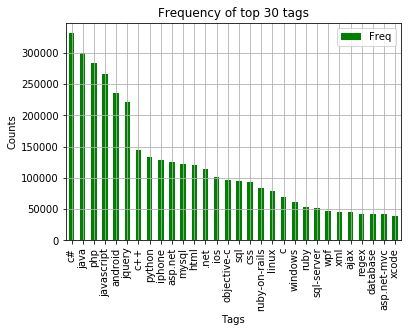

In [36]:
i = np.arange(30)
df_tag_freq_sorted.head(30).plot(kind='bar',color='g')
plt.xticks(i, df_tag_freq_sorted['Tags'].values[:30])
plt.grid()
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Frequency of top 30 tags')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 1M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [37]:
#Reading randomly 100k data points from train database with no duplicates.
if os.path.isfile('train_no_dup.db'):
    conn = sq.connect('train_no_dup.db')
    start = datetime.now()
    df_tag_no_dup = pd.read_sql_query("""SELECT * FROM df_no_dup random limit 100000""",conn)
    print("Time required to run this cell is:", datetime.now() - start)
else:
    print("File does not exists")

Time required to run this cell is: 0:00:03.181152


In [38]:
print("Number of rows in the sampled dataset:", df_tag_no_dup.shape[0])

Number of rows in the sampled dataset: 100000


In [39]:
df_tag_no_dup.head()

,index,Title,Body,Tags,cnt_dup,tag_count
0,0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [94]:
# set of stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","no", "nor", "not"])

__ we create a new data base to store the sampled and processed questions __

In [41]:
if not os.path.isfile("Processed.db"):
    conn = sq.connect("Processed.db")
    c = conn.cursor()
    c.execute("""CREATE TABLE PROCESSED (Body, code, tags, Body_pre,Body_post, is_code)""")
else:
    print("File already exists")
    

In [42]:
snowBall = SnowballStemmer('english')
preprocessed_body = []
preprocessed_code = []
question_with_code = 0
pre_proc_len = 0
post_proc_len = 0
for row in tqdm(df_tag_no_dup.values):
    is_code = 0
    title, body, tags = row[1],row[2],row[3]
    
    if '<code>' in body:
        is_code = 1
        question_with_code += 1
   
    x = len(body) + len(title)
    pre_proc_len += x
    
    code = str(re.findall(r'<code>(.*?)</code>', body, flags=re.DOTALL))
    body = re.sub('<code>(.*?)</code>', '', body, flags=re.MULTILINE|re.DOTALL)
    body = BeautifulSoup(body.encode('utf-8'), 'lxml').get_text()
    title = title.encode('utf-8')
    body = str(title) + " " + str(body)
    body = re.sub(r'[^A-Za-z]+',' ',body)
    body = ' '.join(snowBall.stem(words) for words in body.split())
    body = ' '.join(e.lower() for e in body.split() if e.lower() not in stopwords and (len(e)!=1 or e=='c'))
    post_proc_len += len(body)
    preprocessed_body.append(body)
    preprocessed_code.append(code)
    tup = (body,code,tags,pre_proc_len,post_proc_len,is_code)
    c.execute("""INSERT INTO PROCESSED VALUES (?,?,?,?,?,?)""",tup)

print("Average length of body (title + body) before pre-processing :" ,pre_proc_len / df_tag_no_dup.shape[0])
print("Average length of body (title + body) before pre-processing :" ,post_proc_len / df_tag_no_dup.shape[0])
print("Percent of Questions containing code:", (question_with_code / df_tag_no_dup.shape[0]) * 100 )
conn.commit()
conn.close()

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [06:15<00:00, 266.19it/s]


Average length of body (title + body) before pre-processing : 1232.23945
Average length of body (title + body) before pre-processing : 358.89863
Percent of Questions containing code: 57.37


In [43]:
#Reading few lines from processed database
if os.path.isfile("Processed.db"):
    conn = sq.connect("Processed.db")
    reader = conn.cursor()
    reader.execute("SELECT Body FROM PROCESSED limit 10")
    print("Body after processed")
    print("="*117)
    for x in reader:
        print(x)
        print('-'*117)
    conn.commit()
    conn.close()

else:
    print("File does not exists")


Body after processed
('implement boundari valu analysi softwar test c program answer come form tabl like input rang could vari output come anyon correct code tell wrong',)
---------------------------------------------------------------------------------------------------------------------
('dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem doe bind correct grid come column form whi come grid column although necessari bind thank repli advanc',)
---------------------------------------------------------------------------------------------------------------------
('dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem doe bind correct grid come column form whi come grid column although necessari bind thank repli advanc',)
---------------------------------------------------------------------------------------------------------------------
('java lang noclassdeffounderror javax servlet jsp tagext taglibraryvalid foll

In [44]:
#Reading few of the tags from processed database
if os.path.isfile("Processed.db"):
    conn = sq.connect("Processed.db")
    reader = conn.cursor()
    reader.execute("SELECT Tags FROM PROCESSED limit 10")
    print("Tags after processed")
    print("="*117)
    for x in reader:
        print(x)
        print('-'*117)
    conn.commit()
    conn.close()

else:
    print("File does not exists")


Tags after processed
('c++ c',)
---------------------------------------------------------------------------------------------------------------------
('c# silverlight data-binding',)
---------------------------------------------------------------------------------------------------------------------
('c# silverlight data-binding columns',)
---------------------------------------------------------------------------------------------------------------------
('jsp jstl',)
---------------------------------------------------------------------------------------------------------------------
('java jdbc',)
---------------------------------------------------------------------------------------------------------------------
('facebook api facebook-php-sdk',)
---------------------------------------------------------------------------------------------------------------------
('javascript asp.net web',)
----------------------------------------------------------------------------------------------

<h2>  Modeling with less data points (0.5M data points) and 50 tags only. (We can select more number of tags depending on the computation power) </h2>

In [13]:
if os.path.isfile("Processed.db"):
    conn = sq.connect("Processed.db")
    c = conn.cursor()
    df_processed = pd.read_sql_query("SELECT Body, tags FROM PROCESSED LIMIT 50000",conn)
    conn.commit()
    conn.close()
else:
    print("File does not exists. Plese run previous cells")

In [14]:
df_processed.head(5)

,Body,tags
0,implement boundari valu analysi softwar test c...,c++ c
1,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding
2,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding columns
3,java lang noclassdeffounderror javax servlet j...,jsp jstl
4,java sql sqlexcept microsoft odbc driver manag...,java jdbc


In [15]:
print("Number of data points in sample: ",df_processed.shape[0] )
print("Number of dimensions: ",df_processed.shape[1])

Number of data points in sample:  50000
Number of dimensions:  2


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [16]:
# binary='true' will give a binary vectorizer
bag_of_words = CountVectorizer(binary = True)
bow_tags = bag_of_words.fit_transform(df_processed["tags"])

In [17]:
print("Unique number of tags:", bow_tags.shape[1])
print("Total number of data points:", bow_tags.shape[0])

Unique number of tags: 9084
Total number of data points: 50000


__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [18]:
def explained_questions_fn(number_of_tags, vector_featurizer = None,vectorizer = None):
    """Function to determine the number of questions explained by the 'n' number of tags
    Parameter:
     number_of_tags = total number of tags 
     vectorizer = sparse matrix containing the features of every data point
    """
    b = vector_featurizer.sum(axis = 0).tolist()[0]
    sorted_values = sorted(range(len(b)), key=lambda i: b[i], reverse=True)
    multi_label_yn = vector_featurizer[:,sorted_values[:number_of_tags]]
    questions_exp = multi_label_yn.sum(axis = 1)
    return np.count_nonzero(questions_exp == 0)
def plot_impt_tags(number_of_tags, vector_featurizer,vectorizer):
    """Function to plot the 20 most important tags occuring the dataset"""
    b = vector_featurizer.sum(axis = 0).tolist()[0]
    sorted_values = sorted(range(len(b)), key=lambda i: b[i], reverse=True)
    multi_label_yn = vector_featurizer[:,sorted_values[:number_of_tags]]
    impt_tags = sorted(zip(b,vectorizer.get_feature_names()))
    feature = []
    count = []
    for x,y in impt_tags[::-1][:20]:
        feature.append(x)
        count.append(y)
    plt.figure(figsize=(10,10))
    plt.scatter(feature,count)
    plt.xlabel("Tags")
    plt.ylabel("Count of tag ")
    plt.title("Tag v/s count of tag")
    plt.show()

    

In [53]:
start = datetime.now()
question_explained = []
total_tags = bow_tags.shape[1]
total_questions = bow_tags.shape[0]
for i in range(0,total_tags):
    question_explained.append(np.round(((total_questions-explained_questions_fn(i,bow_tags,bag_of_words))/total_questions)*100,3))
print("Time required to run this cell: ", datetime.now() - start)


Time required to run this cell:  0:00:55.961374


In [56]:
len(question_explained)

9084

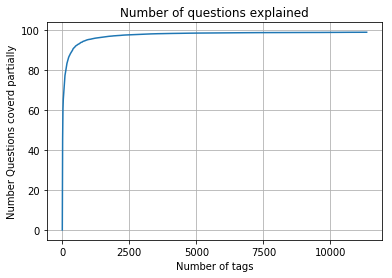

with 5k tags we are covering around 98% questions and with 10k tags we are covering almost 99% of the questions


In [31]:
fig, ax = plt.subplots()
ax.plot(question_explained)
xlabel = list(np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.title("Number of questions explained")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the questions)
print("with 5k tags we are covering around 98% questions and with 10k tags we are covering almost 99% of the questions")


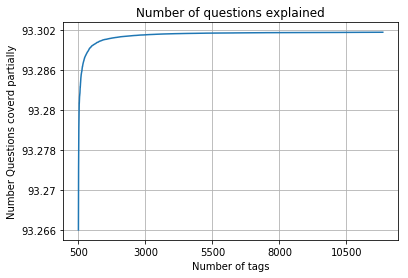

500 tags are covering 70.204  of the questions
with 5500 tags we are covering almost 98.8% of the questions


In [63]:
fig, ax = plt.subplots()
ax.plot(question_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
ax.set_yticklabels(question_explained[500:])
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.title("Number of questions explained")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the questions)
print('500 tags are covering',question_explained[50],' of the questions')
print("with 5500 tags we are covering almost 98.8% of the questions")


In [53]:
print("Number of questions that are not covered : ",explained_questions_fn(5500,bow_tags,bag_of_words),"out of", df_processed.shape[0])

Number of questions that are not covered :  586 out of 50000


In [54]:
print("Number of tags in sample:", bow_tags.shape[1])


Number of tags in sample: 9084


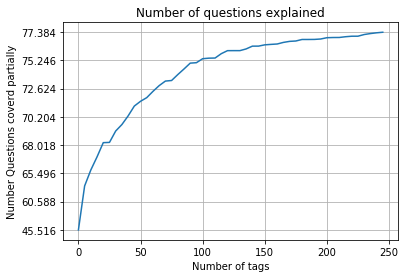

with 50 tags we are covering  70.204 % of the questions


In [101]:
fig, ax = plt.subplots()
ax.plot(question_explained[0:50])
xlabel = list(np.array(range(-50,450,50)))
ax.set_xticklabels(xlabel)
ax.set_yticklabels(question_explained[0:100:10])
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.title("Number of questions explained")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the questions)
print('with 50 tags we are covering ',question_explained[50],'% of the questions')


In [102]:
print("Percentage of tags considered: ",(50/bow_tags.shape[1])*100)

Percentage of tags considered:  0.5504183179216204


__ We consider top 0.5% tags which covers around 70.204% of the questions __

<h2>4.2 Split the data into test and train (80:20) </h2>

In [103]:
total_size=df_processed.shape[0]
train_size=int(0.80*total_size)

x_train=df_processed.head(train_size)
x_test=df_processed.tail(total_size - train_size)

b = bow_tags.sum(axis = 0).tolist()[0]
sorted_values = sorted(range(len(b)), key=lambda i: b[i], reverse=True)
multi_label_yn = bow_tags[:,sorted_values[:50]]

y_train = multi_label_yn[0:train_size,:]
y_test = multi_label_yn[train_size:total_size,:]

In [57]:
print("Number of datapoint in train data :", x_train.shape[0],",",y_train.shape[1])
print("Number of datapoint in test data :",x_test.shape[0],",",y_test.shape[1])

Number of datapoint in train data : 40000 , 50
Number of datapoint in test data : 10000 , 50


<h2>4.3 Featurizing data </h2>

In [58]:
#using bag of words for text featurization with upto 4 grams and limiting the max number of features to 200000
start = datetime.now()
bag_of_words_vec = CountVectorizer(ngram_range= (1,4,),max_features= 200000)
x_train_bag = bag_of_words_vec.fit_transform(x_train['Body'])
x_test_bag = bag_of_words_vec.transform(x_test['Body'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:02.422097


In [59]:
print("Dimensions of train data X:" , x_train_bag.shape,"Y :",y_train.shape)
print("Dimensions of test data X:" , x_test_bag.shape,"Y :",y_test.shape)


Dimensions of train data X: (40000, 200000) Y : (40000, 50)
Dimensions of test data X: (10000, 200000) Y : (10000, 50)


In [69]:
type(y_test)

scipy.sparse.csr.csr_matrix

<h2> 4.4 Applying Logistic Regression with OneVsRest Classifier </h2>

For alpha = 1e-100 , micro f1 score for train data = 0.5129929502670263 and  for cv data = 0.3986382732910994 
For alpha = 1e-90 , micro f1 score for train data = 0.5176436537290355 and  for cv data = 0.39953423467647775 
For alpha = 1e-80 , micro f1 score for train data = 0.5163004189714263 and  for cv data = 0.400698023153344 
For alpha = 1e-70 , micro f1 score for train data = 0.5262482613717528 and  for cv data = 0.4062013328185218 
For alpha = 1e-60 , micro f1 score for train data = 0.525391393641925 and  for cv data = 0.4062100740468699 
For alpha = 1e-50 , micro f1 score for train data = 0.5270854760126097 and  for cv data = 0.4083239342668591 
For alpha = 1e-40 , micro f1 score for train data = 0.5177226148961878 and  for cv data = 0.40027705944637504 
For alpha = 1e-30 , micro f1 score for train data = 0.5255206310136616 and  for cv data = 0.40663791005770944 
For alpha = 1e-20 , micro f1 score for train data = 0.5184429092346191 and  for cv data = 0.40090242845675944 
For alp

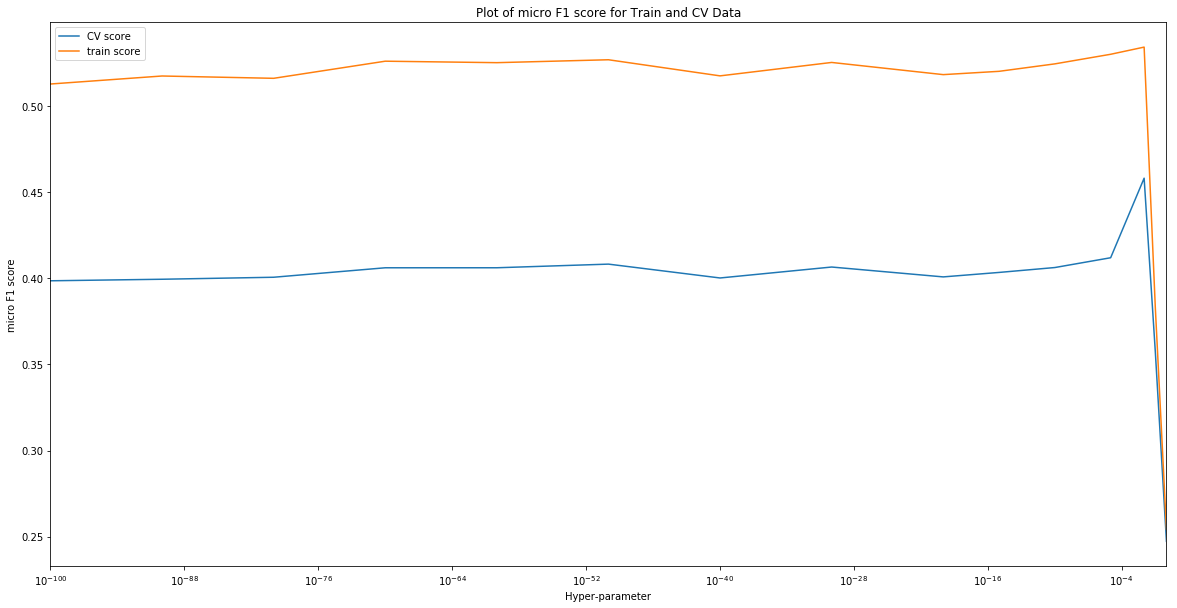

Time required to run this cell: 0:15:29.390900
Optimal value of alpha is: 0.01


In [63]:
# Implementing Logistic Regression with SGD Classifier with log loss
start = datetime.now()
cv_score_train = [] #list to store train F1 score
cv_score_test = [] # list to store test F1 score
#scores_cv = 0
#scores_train = 0
tuned_parameters = [10**-100, 10**-90,10**-80, 10**-70,10**-60, 10**-50,10**-40,10**-30, 10**-20,10**-15, 10**-10,10**-5, 10**-2,10**-1, 10**0] # C values
cv = KFold(n_splits= 5,shuffle=True) # cv folds
for x in tuned_parameters:
    scores_cv = 0 
    scores_train = 0
    classifier = OneVsRestClassifier(SGDClassifier(loss='log',penalty='l2',alpha= x,class_weight="balanced"),n_jobs= 1)# since dataset is imbalanced, class weight is set to 1:5 for resampling the minority class 
    #score = cross_validate(estimator= classifier,scoring="f1_micro",X=x_train_bag,y=y_train,cv = 10,n_jobs=-1,return_train_score=True)
    for train, test in cv.split(x_train_bag, y_train):
                classifier.fit(x_train_bag[train],y_train[train])
                pred_cv_test = classifier.predict(x_train_bag[test]) # prediction using CV 
                pred_train = classifier.predict(x_train_bag[train])# prediction using Train data
                scores_cv += f1_score(y_train[test],pred_cv_test,average='micro') # F1 score for CV
                scores_train += f1_score(y_train[train],pred_train,average = 'micro')# F1 score for Train data
    scores_cv /= 5 # mean F1 score for cv
    scores_train /= 5# mean F1 score for train
    cv_score_test.append(scores_cv)
    cv_score_train.append(scores_train)
    print('For alpha = %r , micro f1 score for train data = %r and  for cv data = %r '%(x,scores_train,scores_cv))
#plot of hyper parameter v/s F1 score    
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters,cv_score_test,label = 'CV score')
plt.plot(tuned_parameters,cv_score_train,label = 'train score')
plt.xlim(10**(-100),10**0)
plt.xscale('log')
plt.legend()
plt.title("Plot of micro F1 score for Train and CV Data")
plt.xlabel('Hyper-parameter')
plt.ylabel('micro F1 score')
plt.show()
optimal_alpha = tuned_parameters[cv_score_test.index(max(cv_score_test))]   
print("Time required to run this cell:", datetime.now() - start)
print("Optimal value of alpha is:",optimal_alpha )

#### Optimal value of alpha is 0.01

In [109]:
#Fitting the one vs rest classifier with optimal value of alpha
model = OneVsRestClassifier(estimator= SGDClassifier(loss='log',alpha=optimal_alpha,class_weight="balanced",n_jobs=-1,penalty='l2' ))
model.fit(x_train_bag,y_train)
micro_f1_train = f1_score(y_train,model.predict(x_train_bag),average='micro')
micro_f1_test = f1_score(y_test,model.predict(x_test_bag),average='micro')
classification_repo = classification_report(y_test,model.predict(x_test_bag))
print("The micro F1 score for the test data is :", micro_f1_test)
print("The micro F1 score for the train data is :", micro_f1_train)
print('-'*117)
print("Classification Report:")
print(classification_repo)

The micro F1 score for the test data is : 0.42114451490334004
The micro F1 score for the train data is : 0.5726156339250311
---------------------------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       644
           1       0.43      0.77      0.55       419
           2       0.24      0.85      0.38       295
           3       0.47      0.74      0.58       929
           4       0.46      0.72      0.56       406
           5       0.09      0.40      0.14         5
           6       0.28      0.83      0.41       445
           7       0.34      0.77      0.47       173
           8       0.34      0.96      0.50       814
           9       0.31      0.83      0.45       545
          10       0.54      0.89      0.67       537
          11       0.54      0.82      0.65       206
          12       0.30      0.9

# Linear SVM using SGD Classifier 

For alpha = 1e-100 , micro f1 score for train data = 0.5169403161183139 and  for cv data = 0.4024797901205325 
For alpha = 1e-90 , micro f1 score for train data = 0.5154684872830471 and  for cv data = 0.401670156317289 
For alpha = 1e-80 , micro f1 score for train data = 0.5206648599208549 and  for cv data = 0.40174389425920953 
For alpha = 1e-70 , micro f1 score for train data = 0.5142835570077681 and  for cv data = 0.4003814851364377 
For alpha = 1e-60 , micro f1 score for train data = 0.521802271201949 and  for cv data = 0.4050755362776311 
For alpha = 1e-50 , micro f1 score for train data = 0.5189847467765569 and  for cv data = 0.4033300418540867 
For alpha = 1e-40 , micro f1 score for train data = 0.5245110574171971 and  for cv data = 0.4069788334257245 
For alpha = 1e-30 , micro f1 score for train data = 0.5177552757411716 and  for cv data = 0.401709727409858 
For alpha = 1e-20 , micro f1 score for train data = 0.519492326323985 and  for cv data = 0.40100361338188584 
For alpha =

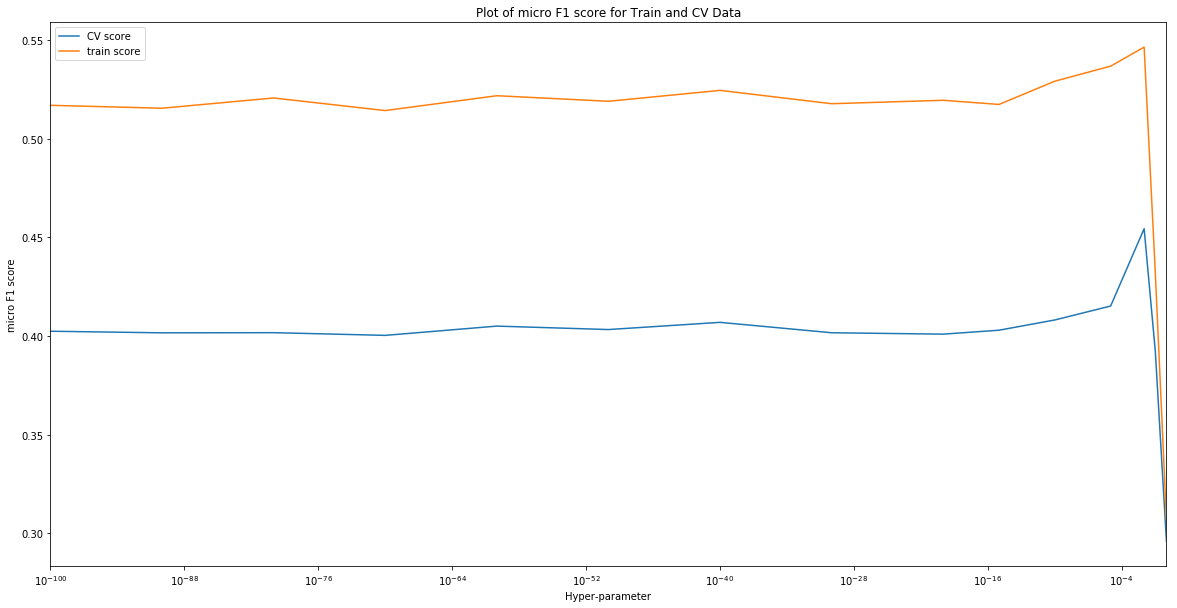

Time required to run this cell: 0:06:25.183285
Optimal value of alpha is: 0.01


In [90]:
#implementation of Linear SVM using SGD classifier with hinge loss.
start = datetime.now()
cv_score_train = []
cv_score_test = []
#scores_cv = 0
#scores_train = 0
tuned_parameters = [10**-100, 10**-90,10**-80, 10**-70,10**-60, 10**-50,10**-40,10**-30, 10**-20,10**-15, 10**-10,10**-5, 10**-2,10**-1, 10**0] # C values
cv = KFold(n_splits= 5,shuffle=True) # cv folds
for x in tuned_parameters:
    scores_cv = 0
    scores_train = 0
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',penalty='l2',alpha= x,class_weight="balanced"),n_jobs= 1)# since dataset is imbalanced, class weight is set to 1:5 for resampling the minority class 
    #score = cross_validate(estimator= classifier,scoring="f1_micro",X=x_train_bag,y=y_train,cv = 10,n_jobs=-1,return_train_score=True)
    for train, test in cv.split(x_train_bag, y_train):
                classifier.fit(x_train_bag[train],y_train[train])
                pred_cv_test = classifier.predict(x_train_bag[test]) # prediction using CV 
                pred_train = classifier.predict(x_train_bag[train])# prediction using Train data
                scores_cv += f1_score(y_train[test],pred_cv_test,average='micro') # F1 score for CV
                scores_train += f1_score(y_train[train],pred_train,average = 'micro')# F1 score for Train data
    scores_cv /= 5 # mean F1 score for cv
    scores_train /= 5# mean F1 score for train
    cv_score_test.append(scores_cv)
    cv_score_train.append(scores_train)
    print('For alpha = %r , micro f1 score for train data = %r and  for cv data = %r '%(x,scores_train,scores_cv))
#plot of hyper parameter v/s F1 score    
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters,cv_score_test,label = 'CV score')
plt.plot(tuned_parameters,cv_score_train,label = 'train score')
plt.xlim(10**(-100),10**0)
plt.xscale('log')
plt.legend()
plt.title("Plot of micro F1 score for Train and CV Data")
plt.xlabel('Hyper-parameter')
plt.ylabel('micro F1 score')
plt.show()
optimal_alpha = tuned_parameters[cv_score_test.index(max(cv_score_test))]   
print("Time required to run this cell:", datetime.now() - start)
print("Optimal value of alpha is:",optimal_alpha )

In [91]:
#Model fitting with optimal value of alpha
model = OneVsRestClassifier(estimator= SGDClassifier(loss='hinge',alpha=optimal_alpha,class_weight="balanced",n_jobs=-1,penalty='l2' ))
model.fit(x_train_bag,y_train)
micro_f1_train = f1_score(y_train,model.predict(x_train_bag),average='micro')
micro_f1_test = f1_score(y_test,model.predict(x_test_bag),average='micro')
y_predicted = model.predict(x_test_bag)
classification_repo = classification_report(y_test,y_predicted)
print("The micro F1 score for the test data is :", micro_f1_test)
print("The micro F1 score for the train data is :", micro_f1_train)
print('-'*117)
print("Classification Report:")
print(classification_repo)

The micro F1 score for the test data is : 0.4000580846583896
The micro F1 score for the train data is : 0.5432942370772229
---------------------------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.58      0.59       644
           1       0.49      0.79      0.61       419
           2       0.27      0.85      0.41       295
           3       0.48      0.73      0.58       929
           4       0.39      0.78      0.52       406
           5       0.12      0.80      0.21         5
           6       0.26      0.86      0.40       445
           7       0.30      0.77      0.43       173
           8       0.37      0.93      0.53       814
           9       0.33      0.78      0.46       545
          10       0.54      0.91      0.68       537
          11       0.59      0.83      0.69       206
          12       0.31      0.94

<h1> Feature Engineering: Giving more weightage to the title.</h1>

<h3> 4.5.1 Preprocessing of questions </h3>

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [92]:
if not os.path.isfile("Processed_weighted_title.db"):
    conn = sq.connect("Processed_weighted_title.db")
    c = conn.cursor()
    c.execute("""CREATE TABLE PROCESSED (Body, code, tags, Body_pre,Body_post, is_code)""")
else:
    print("File already exists")
    

File already exists


In [95]:
#Creating a database with more weightage to title
snowBall = SnowballStemmer('english')
preprocessed_body = []
preprocessed_code = []
question_with_code = 0
pre_proc_len = 0
post_proc_len = 0
for row in tqdm(df_tag_no_dup.values):
    is_code = 0
    title, body, tags = row[1],row[2],row[3]
    
    if '<code>' in body:
        is_code = 1
        question_with_code += 1
   
    x = len(body) + len(title)
    pre_proc_len += x
    
    code = str(re.findall(r'<code>(.*?)</code>', body, flags=re.DOTALL))
    body = re.sub('<code>(.*?)</code>', '', body, flags=re.MULTILINE|re.DOTALL)
    body = BeautifulSoup(body.encode('utf-8'), 'lxml').get_text()
    title = title.encode('utf-8')
    body = str(title) + " " + str(title) + " " + str(title) + " " + str(body) # giving more weightage to title
    body = re.sub(r'[^A-Za-z]+',' ',body)
    body = ' '.join(snowBall.stem(words) for words in body.split())
    body = ' '.join(e.lower() for e in body.split() if e.lower() not in stopwords and (len(e)!=1 or e=='c'))
    post_proc_len += len(body)
    preprocessed_body.append(body)
    preprocessed_code.append(code)
    tup = (body,code,tags,pre_proc_len,post_proc_len,is_code)
    c.execute("""INSERT INTO PROCESSED VALUES (?,?,?,?,?,?)""",tup)

print("Average length of body (title + body) before pre-processing :" ,pre_proc_len / df_tag_no_dup.shape[0])
print("Average length of body (title + body) before pre-processing :" ,post_proc_len / df_tag_no_dup.shape[0])
print("Percent of Questions containing code:", (question_with_code / df_tag_no_dup.shape[0]) * 100 )
conn.commit()
conn.close()

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [03:19<00:00, 502.41it/s]


Average length of body (title + body) before pre-processing : 1232.23945
Average length of body (title + body) before pre-processing : 431.35887
Percent of Questions containing code: 57.37


In [96]:
if os.path.isfile("Processed_weighted_title.db"):
    conn = sq.connect("Processed_weighted_title.db")
    reader = conn.cursor()
    reader.execute("SELECT Body FROM PROCESSED limit 10")
    print("Body after processed")
    print("="*117)
    for x in reader:
        print(x)
        print('-'*117)
    conn.commit()
    conn.close()

else:
    print("File does not exists")


Body after processed
('implement boundari valu analysi softwar test c program implement boundari valu analysi softwar test c program implement boundari valu analysi softwar test c program answer come form tabl like input rang could vari output come anyon correct code tell wrong',)
---------------------------------------------------------------------------------------------------------------------
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem doe bind correct grid come column form whi come grid column although necessari bind thank repli advanc',)
---------------------------------------------------------------------------------------------------------------------
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem doe bind correct grid come column form whi come grid column alth

In [97]:
if os.path.isfile("Processed_weighted_title.db"):
    conn = sq.connect("Processed_weighted_title.db")
    reader = conn.cursor()
    reader.execute("SELECT Tags FROM PROCESSED limit 10")
    print("Tags after processed")
    print("="*117)
    for x in reader:
        print(x)
        print('-'*117)
    conn.commit()
    conn.close()

else:
    print("File does not exists")


Tags after processed
('c++ c',)
---------------------------------------------------------------------------------------------------------------------
('c# silverlight data-binding',)
---------------------------------------------------------------------------------------------------------------------
('c# silverlight data-binding columns',)
---------------------------------------------------------------------------------------------------------------------
('jsp jstl',)
---------------------------------------------------------------------------------------------------------------------
('java jdbc',)
---------------------------------------------------------------------------------------------------------------------
('facebook api facebook-php-sdk',)
---------------------------------------------------------------------------------------------------------------------
('javascript asp.net web',)
----------------------------------------------------------------------------------------------

In [98]:
if os.path.isfile("Processed_weighted_title.db"):
    conn = sq.connect("Processed_weighted_title.db")
    c = conn.cursor()
    df_processed_title = pd.read_sql_query("SELECT Body, tags FROM PROCESSED LIMIT 50000",conn)
    conn.commit()
    conn.close()
else:
    print("File does not exists. Plese run previous cells")

In [99]:
df_processed_title.head(5)

,Body,tags
0,implement boundari valu analysi softwar test c...,c++ c
1,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding
2,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
3,java lang noclassdeffounderror javax servlet j...,jsp jstl
4,java sql sqlexcept microsoft odbc driver manag...,java jdbc


In [100]:
print("Number of data points in sample: ",df_processed_title.shape[0] )
print("Number of dimensions: ",df_processed_title.shape[1])

Number of data points in sample:  50000
Number of dimensions:  2


<h2>4.2 Split the data into test and train (80:20) </h2>

In [101]:
total_size=df_processed_title.shape[0]
train_size=int(0.80*total_size)

x_train=df_processed_title.head(train_size)
x_test=df_processed_title.tail(total_size - train_size)

b = bow_tags.sum(axis = 0).tolist()[0]
sorted_values = sorted(range(len(b)), key=lambda i: b[i], reverse=True)
multi_label_yn = bow_tags[:,sorted_values[:50]]

y_train = multi_label_yn[0:train_size,:]
y_test = multi_label_yn[train_size:total_size,:]

In [102]:
print("Number of datapoint in train data :", x_train.shape[0],",",y_train.shape[1])
print("Number of datapoint in test data :",x_test.shape[0],",",y_test.shape[1])

Number of datapoint in train data : 40000 , 50
Number of datapoint in test data : 10000 , 50


<h2>4.3 Featurizing data </h2>

In [103]:
start = datetime.now()
bag_of_words_vec = CountVectorizer(ngram_range= (1,4,),max_features= 200000)
x_train_bag = bag_of_words_vec.fit_transform(x_train['Body'])
x_test_bag = bag_of_words_vec.transform(x_test['Body'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:02:39.121757


In [104]:
print("Dimensions of train data X:" , x_train_bag.shape,"Y :",y_train.shape)
print("Dimensions of test data X:" , x_test_bag.shape,"Y :",y_test.shape)


Dimensions of train data X: (40000, 200000) Y : (40000, 50)
Dimensions of test data X: (10000, 200000) Y : (10000, 50)


<h2> 4.4 Applying Logistic Regression with OneVsRest Classifier </h2>

For alpha = 1e-100 , micro f1 score for train data = 0.5376808360480074 and  for cv data = 0.41188565987591463 
For alpha = 1e-90 , micro f1 score for train data = 0.5490509188136576 and  for cv data = 0.4200095223405638 
For alpha = 1e-80 , micro f1 score for train data = 0.5399912274994036 and  for cv data = 0.4140030963354754 
For alpha = 1e-70 , micro f1 score for train data = 0.5299901597593293 and  for cv data = 0.4068562114252353 
For alpha = 1e-60 , micro f1 score for train data = 0.5361533610197667 and  for cv data = 0.4103502905314132 
For alpha = 1e-50 , micro f1 score for train data = 0.5345142603107896 and  for cv data = 0.40976173803944355 
For alpha = 1e-40 , micro f1 score for train data = 0.5352605608999073 and  for cv data = 0.4097031680693052 
For alpha = 1e-30 , micro f1 score for train data = 0.5305028359536363 and  for cv data = 0.40672227733168353 
For alpha = 1e-20 , micro f1 score for train data = 0.5381204468839316 and  for cv data = 0.4130084884327224 
For al

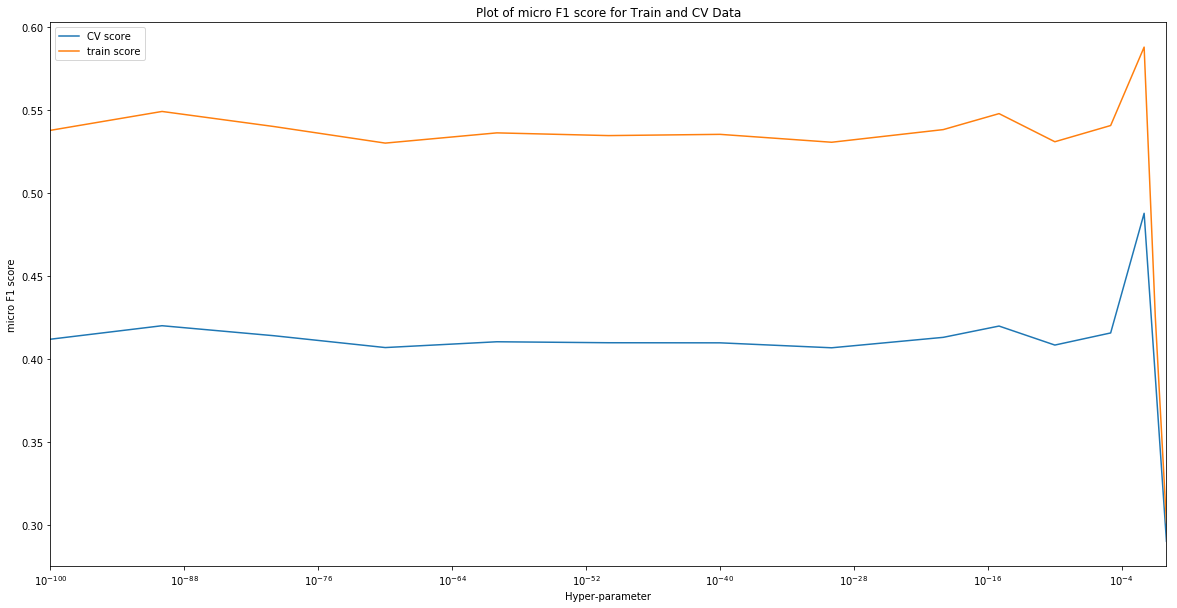

Time required to run this cell: 0:08:05.745363
Optimal value of alpha is: 0.01


In [105]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
start = datetime.now()
cv_score_train = []
cv_score_test = []
#scores_cv = 0
#scores_train = 0
tuned_parameters = [10**-100, 10**-90,10**-80, 10**-70,10**-60, 10**-50,10**-40,10**-30, 10**-20,10**-15, 10**-10,10**-5, 10**-2,10**-1, 10**0] # C values
cv = KFold(n_splits= 5,shuffle=True) # cv folds
for x in tuned_parameters:
    scores_cv = 0
    scores_train = 0
    classifier = OneVsRestClassifier(SGDClassifier(loss='log',penalty='l2',alpha= x,class_weight="balanced"),n_jobs= 1)# since dataset is imbalanced, class weight is set to 1:5 for resampling the minority class 
    #score = cross_validate(estimator= classifier,scoring="f1_micro",X=x_train_bag,y=y_train,cv = 10,n_jobs=-1,return_train_score=True)
    for train, test in cv.split(x_train_bag, y_train):
                classifier.fit(x_train_bag[train],y_train[train])
                pred_cv_test = classifier.predict(x_train_bag[test]) # prediction using CV 
                pred_train = classifier.predict(x_train_bag[train])# prediction using Train data
                scores_cv += f1_score(y_train[test],pred_cv_test,average='micro') # F1 score for CV
                scores_train += f1_score(y_train[train],pred_train,average = 'micro')# F1 score for Train data
    scores_cv /= 5 # mean F1 score for cv
    scores_train /= 5# mean F1 score for train
    cv_score_test.append(scores_cv)
    cv_score_train.append(scores_train)
    print('For alpha = %r , micro f1 score for train data = %r and  for cv data = %r '%(x,scores_train,scores_cv))
 #plot of hyper parameter v/s F1 score   
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters,cv_score_test,label = 'CV score')
plt.plot(tuned_parameters,cv_score_train,label = 'train score')
plt.xlim(10**(-100),10**0)
plt.xscale('log')
plt.legend()
plt.title("Plot of micro F1 score for Train and CV Data")
plt.xlabel('Hyper-parameter')
plt.ylabel('micro F1 score')
plt.show()
optimal_alpha = tuned_parameters[cv_score_test.index(max(cv_score_test))]   
print("Time required to run this cell:", datetime.now() - start)
print("Optimal value of alpha is:",optimal_alpha )

#### Optimal value of alpha is 0.01

In [106]:
#Model fitting with optimal value of alpha
model = OneVsRestClassifier(estimator= SGDClassifier(loss='log',alpha=optimal_alpha,class_weight="balanced",n_jobs=-1,penalty='l2' ))
model.fit(x_train_bag,y_train)
micro_f1_train = f1_score(y_train,model.predict(x_train_bag),average='micro')
micro_f1_test = f1_score(y_test,model.predict(x_test_bag),average='micro')
classification_repo = classification_report(y_test,model.predict(x_test_bag))
print("The micro F1 score for the test data is :", micro_f1_test)
print("The micro F1 score for the train data is :", micro_f1_train)
print('-'*117)
print("Classification Report:")
print(classification_repo)

The micro F1 score for the test data is : 0.4132895034001656
The micro F1 score for the train data is : 0.5676513493800147
---------------------------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       644
           1       0.40      0.79      0.53       419
           2       0.24      0.85      0.38       295
           3       0.42      0.77      0.55       929
           4       0.52      0.67      0.58       406
           5       0.11      0.40      0.17         5
           6       0.27      0.84      0.41       445
           7       0.33      0.77      0.46       173
           8       0.33      0.96      0.50       814
           9       0.31      0.82      0.45       545
          10       0.49      0.91      0.64       537
          11       0.47      0.83      0.60       206
          12       0.33      0.94

<h1> Linear SVM using SGD classifier </h1>

For alpha = 1e-100 , micro f1 score for train data = 0.5259201730052618 and  for cv data = 0.40509529947058753 
For alpha = 1e-90 , micro f1 score for train data = 0.5385176168614817 and  for cv data = 0.41301656562445943 
For alpha = 1e-80 , micro f1 score for train data = 0.530458324455832 and  for cv data = 0.40737838966902185 
For alpha = 1e-70 , micro f1 score for train data = 0.5366316828307167 and  for cv data = 0.41106338127112074 
For alpha = 1e-60 , micro f1 score for train data = 0.5407712777358686 and  for cv data = 0.41459670228309065 
For alpha = 1e-50 , micro f1 score for train data = 0.5377749156119217 and  for cv data = 0.4122706466541666 
For alpha = 1e-40 , micro f1 score for train data = 0.5312433003990027 and  for cv data = 0.40781416169193696 
For alpha = 1e-30 , micro f1 score for train data = 0.5440211289869592 and  for cv data = 0.41588819215469564 
For alpha = 1e-20 , micro f1 score for train data = 0.5315634122079901 and  for cv data = 0.40552201462576737 
Fo

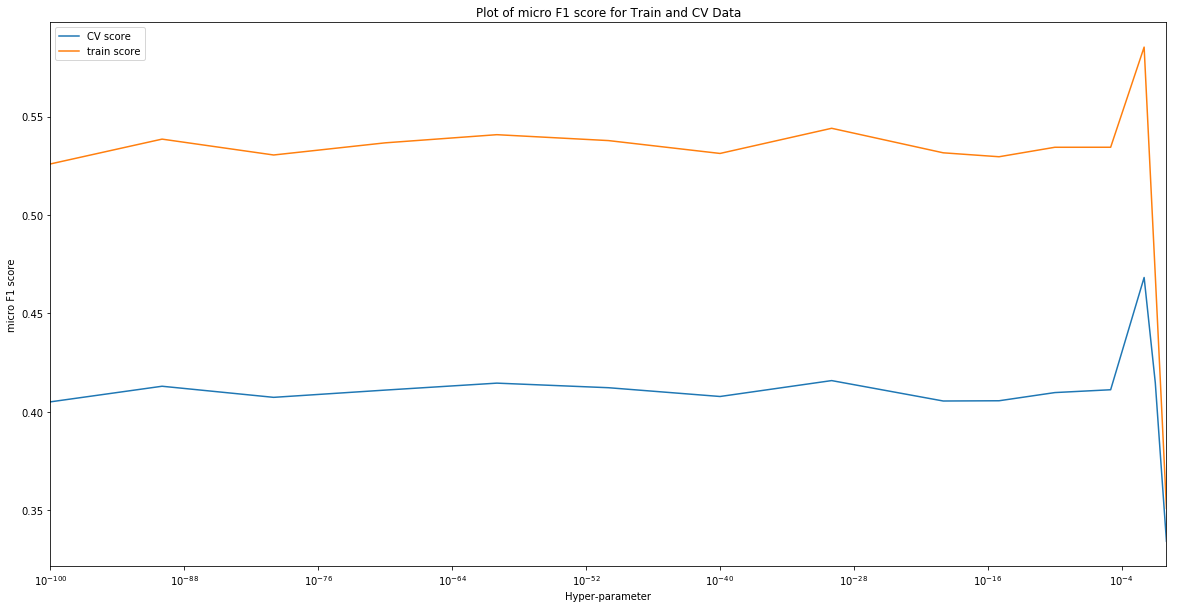

Time required to run this cell: 0:05:58.717275
Optimal value of alpha is: 0.01


In [107]:
#implementation of Linear SVM using SGD classifier with hinge loss.
start = datetime.now()
cv_score_train = []
cv_score_test = []
#scores_cv = 0
#scores_train = 0
tuned_parameters = [10**-100, 10**-90,10**-80, 10**-70,10**-60, 10**-50,10**-40,10**-30, 10**-20,10**-15, 10**-10,10**-5, 10**-2,10**-1, 10**0] # C values
cv = KFold(n_splits= 5,shuffle=True) # cv folds
for x in tuned_parameters:
    scores_cv = 0
    scores_train = 0
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',penalty='l2',alpha= x,class_weight="balanced"),n_jobs= 1)# since dataset is imbalanced, class weight is set to 1:5 for resampling the minority class 
    #score = cross_validate(estimator= classifier,scoring="f1_micro",X=x_train_bag,y=y_train,cv = 10,n_jobs=-1,return_train_score=True)
    for train, test in cv.split(x_train_bag, y_train):
                classifier.fit(x_train_bag[train],y_train[train])
                pred_cv_test = classifier.predict(x_train_bag[test]) # prediction using CV 
                pred_train = classifier.predict(x_train_bag[train])# prediction using Train data
                scores_cv += f1_score(y_train[test],pred_cv_test,average='micro') # F1 score for CV
                scores_train += f1_score(y_train[train],pred_train,average = 'micro')# F1 score for Train data
    scores_cv /= 5 # mean F1 score for cv
    scores_train /= 5# mean F1 score for train
    cv_score_test.append(scores_cv)
    cv_score_train.append(scores_train)
    print('For alpha = %r , micro f1 score for train data = %r and  for cv data = %r '%(x,scores_train,scores_cv))
#plot of hyper parameter v/s F1 score    
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters,cv_score_test,label = 'CV score')
plt.plot(tuned_parameters,cv_score_train,label = 'train score')
plt.xlim(10**(-100),10**0)
plt.xscale('log')
plt.legend()
plt.title("Plot of micro F1 score for Train and CV Data")
plt.xlabel('Hyper-parameter')
plt.ylabel('micro F1 score')
plt.show()
optimal_alpha = tuned_parameters[cv_score_test.index(max(cv_score_test))]   
print("Time required to run this cell:", datetime.now() - start)
print("Optimal value of alpha is:",optimal_alpha )

In [108]:
#Model fitting with optimal value of alpha
model = OneVsRestClassifier(estimator= SGDClassifier(loss='hinge',alpha=optimal_alpha,class_weight="balanced",n_jobs=-1,penalty='l2' ))
model.fit(x_train_bag,y_train)
micro_f1_train = f1_score(y_train,model.predict(x_train_bag),average='micro')
micro_f1_test = f1_score(y_test,model.predict(x_test_bag),average='micro')
classification_repo = classification_report(y_test,model.predict(x_test_bag))
print("The micro F1 score for the test data is :", micro_f1_test)
print("The micro F1 score for the train data is :", micro_f1_train)
print('-'*117)
print("Classification Report:")
print(classification_repo)

The micro F1 score for the test data is : 0.39302902143794666
The micro F1 score for the train data is : 0.5754216535816898
---------------------------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       644
           1       0.39      0.80      0.52       419
           2       0.25      0.86      0.39       295
           3       0.47      0.71      0.57       929
           4       0.50      0.68      0.58       406
           5       0.11      0.40      0.17         5
           6       0.29      0.80      0.43       445
           7       0.26      0.77      0.39       173
           8       0.35      0.93      0.51       814
           9       0.34      0.79      0.48       545
          10       0.60      0.86      0.71       537
          11       0.57      0.79      0.66       206
          12       0.36      0.8

In [153]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model","Optimal Hyper-parameter","micro F1 score"]
table.add_row (['Logistic Regression',0.01,0.42])
table.add_row (['Linear SVM',0.01,0.40])
table.add_row (['Logistic Regression (with more weightage to title)', 0.01,0.41])
table.add_row (['Linear SVM (with more weightage to title)', 0.01,0.39])

In [154]:
print(table)

+----------------------------------------------------+-------------------------+----------------+
|                       Model                        | Optimal Hyper-parameter | micro F1 score |
+----------------------------------------------------+-------------------------+----------------+
|                Logistic Regression                 |           0.01          |      0.42      |
|                     Linear SVM                     |           0.01          |      0.4       |
| Logistic Regression (with more weightage to title) |           0.01          |      0.41      |
|     Linear SVM (with more weightage to title)      |           0.01          |      0.39      |
+----------------------------------------------------+-------------------------+----------------+


# Observation:

1) Logistic Regression preforms better as compared to linear SVM. Also by giving more weightage to title, there is no significant improvement in model performance.  
  
2) By using more tags we can improve the model performance.  

# Procedure :

1) First we read the csv file and store it as a SQL file, so that we can read and process the file with ease.
  
2) Second we count the total number of datapoints in our dataset. We also check if any duplicate enteries are present, if present we remove them and update the database with duplicate enteries been removed.
  
3) We find the number of unique tags in the dataset. We also determine, how many number of times a tag has occurred in the dataset. We then plot the distrubution of all the tags in the dataset, followed by first 10k tags, 5k tags, 1k tags and finally 100 tags.  
  
4) Then we find how many tags are present per question. We observe that, maximum number of tags per question is 5, minimum is 1 and average is around 2.89 tags/ question.  
  
5) We find the top 30 tags and plot its graph.  
  
6) We then perform data pre-processing, where we try to remove the code from body, remove stop words from title and body, remove all html tags, perform stemming and replace all the words in lower form.
  
7) Onec pre - processing steps are done, we save the processed dataset in the SQL database for further processing.  
  
8) We convert the tags for multilabel classification problem.  
  
9) After doing a bit of EDA on tags, we finally choose 50 tags for classification. We choose 50 tags just to reduce computation time. With 50 tags we are able to cover around 70% of the questions.  
  
10) After performing train test split,Logistic Regression and Linear SVM models are  used to predict the tags for a given question.  The micro F1 score for both the models are shown in the table.  
  
11) We then perform Feature engineering by giving more weightage to title than body and try to predict the tags for a goven question using Logistic Regression and Linear SVM model. The micro F1 score for both models are shown in the table.  
  
12) micro F1 score can be improved further, if we use more number of tags. WE have used only 50 tags.  

# Additional EDA :
  
Done in cell number 31,63 and 101. WE have tried finding the number of tags explanning each questions.  

<h1> END </h1>